# Champions League 2025-2026 Data Science Project

---

## Beginning

### Overview
This project analyzes **Champions League 2025-2026 match data** using Python. The goal is to explore match statistics, identify trends, and provide insights on team performance, results, and key metrics.

### Business Understanding
Understanding football match outcomes can help with:
- Team performance analysis  
- Identifying strengths and weaknesses  
- Supporting predictive modeling for match results  
- Enhancing fantasy football decisions


## Data Understanding

In this step, we explore the Champions League 2025-2026 dataset to understand its structure, types of columns, and any missing values. This helps us know what cleaning and preparation we need before analysis.


In [243]:
### 1. Load the Dataset
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/champions_league_matches.csv')
df.head()

,date,home_team,away_team,score,venue,referee,home_possession,away_possession,home_shots_on_target,away_shots_on_target,home_saves,away_saves,home_shots_on_target_pct,away_shots_on_target_pct,home_saves_pct,away_saves_pct,result,winner
0,2025-09-16,PSV,Union SG,1–3,Philips Stadion,Anthony Taylor,63%,37%,3 of 10,8 of 18,4 of 8,2 of 3,30.0,44.4,50.0,66.7,Away Win,Union SG
1,2025-09-16,Athletic Club,Arsenal,0–2,San Mamés,Donatas Rumšas,38%,62%,2 of 11,6 of 11,4 of 6,2 of 2,18.2,54.5,66.7,100.0,Away Win,Arsenal
2,2025-09-16,Tottenham Hotspur,Villarreal,1–0,Tottenham Hotspur Stadium,Rade Obrenović,58%,42%,1 of 9,0 of 10,0 of 0,1 of 1,11.1,0.0,NaN,100.0,Home Win,Tottenham Hotspur
3,2025-09-16,Benfica,Qarabağ,2–3,Estádio do Sport Lisboa e Benfica,Erik Lambrechts,53%,47%,3 of 14,5 of 10,2 of 5,1 of 3,21.4,50.0,40.0,33.3,Away Win,Qarabağ
4,2025-09-16,Juventus,Dortmund,4–4,Allianz Stadium,François Letexier,52%,48%,7 of 19,5 of 10,1 of 5,3 of 7,36.8,50.0,20.0,42.9,Draw,Draw


In [244]:
# dataset information
df.info

<bound method DataFrame.info of            date            home_team         away_team score  \
0    2025-09-16                  PSV          Union SG   1–3   
1    2025-09-16        Athletic Club           Arsenal   0–2   
2    2025-09-16    Tottenham Hotspur        Villarreal   1–0   
3    2025-09-16              Benfica           Qarabağ   2–3   
4    2025-09-16             Juventus          Dortmund   4–4   
..          ...                  ...               ...   ...   
146  2026-01-28            Barcelona     FC Copenhagen   4–1   
147  2026-01-28           Leverkusen        Villarreal   3–0   
148  2026-01-28  Paris Saint-Germain  Newcastle United   1–1   
149  2026-01-28               Napoli           Chelsea   2–3   
150  2026-01-28             Pafos FC     Slavia Prague   4–1   

                                 venue            referee home_possession  \
0                      Philips Stadion     Anthony Taylor             63%   
1                            San Mamés     Do

In [245]:
# check for missing values
df.isnull().sum()

date                         7
home_team                    7
away_team                    7
score                        7
venue                        7
referee                      7
home_possession              7
away_possession              7
home_shots_on_target         7
away_shots_on_target         7
home_saves                   7
away_saves                   7
home_shots_on_target_pct     7
away_shots_on_target_pct     7
home_saves_pct              10
away_saves_pct               7
result                       7
winner                       7
dtype: int64

In [246]:
# sammary statistics
df.describe()

,home_shots_on_target_pct,away_shots_on_target_pct,home_saves_pct,away_saves_pct
count,144.00000,144.000000,141.000000,144.000000
mean,37.35000,38.147917,67.666667,65.104167
std,14.27387,17.319947,28.335847,25.537119
min,6.20000,0.000000,0.000000,0.000000
25%,26.70000,27.150000,50.000000,50.000000
50%,36.80000,35.300000,66.700000,66.700000
75%,45.72500,46.800000,100.000000,85.700000
max,80.00000,100.000000,100.000000,100.000000


In [247]:
# See the data type of each column
df.dtypes


date                         object
home_team                    object
away_team                    object
score                        object
venue                        object
referee                      object
home_possession              object
away_possession              object
home_shots_on_target         object
away_shots_on_target         object
home_saves                   object
away_saves                   object
home_shots_on_target_pct    float64
away_shots_on_target_pct    float64
home_saves_pct              float64
away_saves_pct              float64
result                       object
winner                       object
dtype: object

In [248]:
# Example: unique home teams and away teams
print("Home teams:", df['home_team'].unique())
print("Away teams:", df['away_team'].unique())

# Example: match results
print("Match results:", df['result'].unique())


Home teams: ['PSV' 'Athletic Club' 'Tottenham Hotspur' 'Benfica' 'Juventus'
 'Real Madrid' 'Slavia Prague' 'Olympiacos' 'Liverpool' 'Ajax'
 'Bayern Munich' 'Paris Saint-Germain' 'Club Brugge' 'FC Copenhagen'
 'Manchester City' 'Sporting CP' 'Newcastle United' 'Eintracht Frankfurt'
 nan 'Atalanta' 'Chelsea' 'Atlético Madrid' 'Inter' 'Bodø/Glimt'
 'Marseille' 'FC Kairat' 'Galatasaray' 'Pafos FC' 'Union SG' 'Arsenal'
 'Qarabağ' 'Barcelona' 'Leverkusen' 'Napoli' 'Dortmund' 'Monaco'
 'Villarreal']
Away teams: ['Union SG' 'Arsenal' 'Villarreal' 'Qarabağ' 'Dortmund' 'Marseille'
 'Bodø/Glimt' 'Pafos FC' 'Atlético Madrid' 'Inter' 'Chelsea' 'Atalanta'
 'Monaco' 'Leverkusen' 'Napoli' 'FC Kairat' 'Barcelona' 'Galatasaray' nan
 'Club Brugge' 'Benfica' 'Eintracht Frankfurt' 'Slavia Prague'
 'Tottenham Hotspur' 'Ajax' 'Real Madrid' 'Liverpool' 'Bayern Munich'
 'Newcastle United' 'Olympiacos' 'FC Copenhagen' 'Paris Saint-Germain'
 'PSV' 'Sporting CP' 'Athletic Club' 'Manchester City' 'Juventus']
Match

In [249]:
df.columns

Index(['date', 'home_team', 'away_team', 'score', 'venue', 'referee',
       'home_possession', 'away_possession', 'home_shots_on_target',
       'away_shots_on_target', 'home_saves', 'away_saves',
       'home_shots_on_target_pct', 'away_shots_on_target_pct',
       'home_saves_pct', 'away_saves_pct', 'result', 'winner'],
      dtype='object')

# Data Cleaning

In this step, we clean the Champions League dataset to ensure it is ready for analysis.

We will perform the following tasks:
1. Inspect the dataset for missing values and duplicates.
2. Convert the 'date' column to datetime format.
3. Handle missing values where necessary.
4. Standardize textual columns (team names, venues).
5. Ensure numerical columns are in the correct data type.

In [250]:
# inspecting data
print("Dataset Info:")

Dataset Info:


In [251]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      144 non-null    object 
 1   home_team                 144 non-null    object 
 2   away_team                 144 non-null    object 
 3   score                     144 non-null    object 
 4   venue                     144 non-null    object 
 5   referee                   144 non-null    object 
 6   home_possession           144 non-null    object 
 7   away_possession           144 non-null    object 
 8   home_shots_on_target      144 non-null    object 
 9   away_shots_on_target      144 non-null    object 
 10  home_saves                144 non-null    object 
 11  away_saves                144 non-null    object 
 12  home_shots_on_target_pct  144 non-null    float64
 13  away_shots_on_target_pct  144 non-null    float64
 14  home_saves

In [252]:
print("\nFirst 5 rows:")
print(df.head())



First 5 rows:
         date          home_team   away_team score  \
0  2025-09-16                PSV    Union SG   1–3   
1  2025-09-16      Athletic Club     Arsenal   0–2   
2  2025-09-16  Tottenham Hotspur  Villarreal   1–0   
3  2025-09-16            Benfica     Qarabağ   2–3   
4  2025-09-16           Juventus    Dortmund   4–4   

                               venue            referee home_possession  \
0                    Philips Stadion     Anthony Taylor             63%   
1                          San Mamés     Donatas Rumšas             38%   
2          Tottenham Hotspur Stadium     Rade Obrenović             58%   
3  Estádio do Sport Lisboa e Benfica    Erik Lambrechts             53%   
4                    Allianz Stadium  François Letexier             52%   

  away_possession home_shots_on_target away_shots_on_target home_saves  \
0             37%              3 of 10              8 of 18     4 of 8   
1             62%              2 of 11              6 of 11  

In [253]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       home_shots_on_target_pct  away_shots_on_target_pct  home_saves_pct  \
count                 144.00000                144.000000      141.000000   
mean                   37.35000                 38.147917       67.666667   
std                    14.27387                 17.319947       28.335847   
min                     6.20000                  0.000000        0.000000   
25%                    26.70000                 27.150000       50.000000   
50%                    36.80000                 35.300000       66.700000   
75%                    45.72500                 46.800000      100.000000   
max                    80.00000                100.000000      100.000000   

       away_saves_pct  
count      144.000000  
mean        65.104167  
std         25.537119  
min          0.000000  
25%         50.000000  
50%         66.700000  
75%         85.700000  
max        100.000000  


In [254]:
# 2. Check for Missing Values
missing_values = df.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)


Missing Values per Column:
date                         7
home_team                    7
away_team                    7
score                        7
venue                        7
referee                      7
home_possession              7
away_possession              7
home_shots_on_target         7
away_shots_on_target         7
home_saves                   7
away_saves                   7
home_shots_on_target_pct     7
away_shots_on_target_pct     7
home_saves_pct              10
away_saves_pct               7
result                       7
winner                       7
dtype: int64


In [255]:
# 3. Check for Duplicates
# -------------------------------
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)



Number of duplicate rows: 6


In [256]:
# Drop duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")


Duplicates removed.


In [257]:
# Ensure df is a copy (not a slice)
df = df.copy()

# Convert 'date' column safely
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check missing dates
print("Any missing dates after conversion:", df['date'].isnull().sum())

# Optional: extract year, month, day, weekday
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()

# Preview
print(df[['date', 'year', 'month', 'day', 'weekday']].head())


Any missing dates after conversion: 1
        date    year  month   day  weekday
0 2025-09-16  2025.0    9.0  16.0  Tuesday
1 2025-09-16  2025.0    9.0  16.0  Tuesday
2 2025-09-16  2025.0    9.0  16.0  Tuesday
3 2025-09-16  2025.0    9.0  16.0  Tuesday
4 2025-09-16  2025.0    9.0  16.0  Tuesday


In [258]:
# percentage columns
percentage_cols = ['home_possession', 'away_possession']

for col in percentage_cols:
    # Convert all values to string first, then remove '%', then convert to float
    df[col] = df[col].astype(str).str.replace('%', '', regex=False)
    
    # Convert to numeric (coerce errors to NaN)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Fill any missing values with median
    df[col].fillna(df[col].median(), inplace=True)

    print(f"Column '{col}' cleaned. Missing values filled with median.")


Column 'home_possession' cleaned. Missing values filled with median.
Column 'away_possession' cleaned. Missing values filled with median.


In [259]:
# Numerical columns where we fill missing values with median
numerical_cols = [
    'home_possession', 'away_possession', 
    'home_shots_on_target', 'away_shots_on_target',
    'home_saves', 'away_saves'
]

for col in numerical_cols:
    if col in ['home_possession', 'away_possession']:
        # Already handled in percentage cleaning
        continue
    # Fill missing numerical values with median
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Ensure numeric
    missing_count = df[col].isnull().sum()
    df[col].fillna(df[col].median(), inplace=True)
    if missing_count > 0:
        print(f"Filled {missing_count} missing values in column '{col}' with median.")

Filled 145 missing values in column 'home_shots_on_target' with median.
Filled 145 missing values in column 'away_shots_on_target' with median.
Filled 145 missing values in column 'home_saves' with median.
Filled 145 missing values in column 'away_saves' with median.


In [260]:
# Text columns where we fill missing values with 'Unknown' and standardize
text_cols = ['home_team', 'away_team', 'venue', 'referee', 'winner', 'result']

for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.title()
    missing_count = df[col].isnull().sum()
    df[col].fillna('Unknown', inplace=True)
    if missing_count > 0:
        print(f"Filled {missing_count} missing values in column '{col}' with 'Unknown'.")
print("\nCleaned dataset info:")
print(df.info())


Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 150
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      144 non-null    datetime64[ns]
 1   home_team                 145 non-null    object        
 2   away_team                 145 non-null    object        
 3   score                     144 non-null    object        
 4   venue                     145 non-null    object        
 5   referee                   145 non-null    object        
 6   home_possession           145 non-null    float64       
 7   away_possession           145 non-null    float64       
 8   home_shots_on_target      0 non-null      float64       
 9   away_shots_on_target      0 non-null      float64       
 10  home_saves                0 non-null      float64       
 11  away_saves                0 non-null      float64       
 12 

In [261]:
print("\nFirst 5 rows after cleaning:")
print(df.head())


First 5 rows after cleaning:
        date          home_team   away_team score  \
0 2025-09-16                Psv    Union Sg   1–3   
1 2025-09-16      Athletic Club     Arsenal   0–2   
2 2025-09-16  Tottenham Hotspur  Villarreal   1–0   
3 2025-09-16            Benfica     Qarabağ   2–3   
4 2025-09-16           Juventus    Dortmund   4–4   

                               venue            referee  home_possession  \
0                    Philips Stadion     Anthony Taylor             63.0   
1                          San Mamés     Donatas Rumšas             38.0   
2          Tottenham Hotspur Stadium     Rade Obrenović             58.0   
3  Estádio Do Sport Lisboa E Benfica    Erik Lambrechts             53.0   
4                    Allianz Stadium  François Letexier             52.0   

   away_possession  home_shots_on_target  away_shots_on_target  ...  \
0             37.0                   NaN                   NaN  ...   
1             62.0                   NaN            

# Champions League Matches Data Analysis

## Dataset Overview

The dataset contains historical match data for the UEFA Champions League. It includes detailed information about each match, such as the teams involved, scores, match date, venue, referee, and key match statistics like possession, shots on target, and saves.  

### Columns in the Dataset

- **date**: The date when the match was played (converted to datetime for analysis).  
- **home_team**: Name of the home team.  
- **away_team**: Name of the away team.  
- **home_score**: Goals scored by the home team.  
- **away_score**: Goals scored by the away team.  
- **venue**: Stadium or location where the match took place.  
- **referee**: Name of the referee officiating the match.  
- **winner**: Outcome of the match (`Home`, `Away`, or `Draw`).  
- **result**: Optional textual description of the match result.  
- **home_possession**: Percentage possession of the home team.  
- **away_possession**: Percentage possession of the away team.  
- **home_shots_on_target**: Number of shots on target by the home team.  
- **away_shots_on_target**: Number of shots on target by the away team.  
- **home_saves**: Number of saves by the home team.  
- **away_saves**: Number of saves by the away team.  

### Key Points

- The dataset contains both categorical and numerical features.  
- Dates are standardized as datetime objects for time-series analysis.  
- Percentage values (like possession) are converted to numeric floats.  
- Missing values have been handled during data cleaning to ensure consistency.  

This dataset allows us to explore various trends such as team performance over seasons, home vs away advantages, top scoring teams, and the influence of match statistics on outcomes.


In [262]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


In [263]:
import os
print(os.getcwd())


c:\Users\User\OneDrive\Documents\FLATIRON\champions-league-ds\notebooks


In [264]:
import os

os.makedirs("data", exist_ok=True)


In [265]:
cleaned_path = "data/champions_league_matches_cleaned.csv"

df.to_csv(cleaned_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_path}")


Cleaned dataset saved to: data/champions_league_matches_cleaned.csv


## Data Visualization

Data visualization is the process of representing data using charts, graphs, and plots to make patterns, trends, and relationships easier to understand. Instead of relying only on tables or numbers, visualizations help reveal insights quickly and clearly.

In this project, visualizations are used to explore team performance, match outcomes, and key match statistics such as goals, possession, and shots on target. These visuals support data-driven insights and make the analysis more interpretable.


## Home vs Away Match Outcomes

This chart compares the frequency of home wins, away wins, and draws.
It helps evaluate whether home advantage exists in Champions League matches.


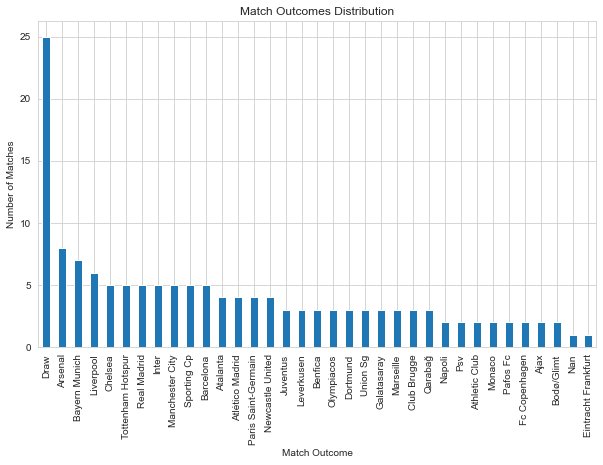

In [266]:
outcome_counts = df['winner'].value_counts()

outcome_counts.plot(kind='bar')
plt.title("Match Outcomes Distribution")
plt.xlabel("Match Outcome")
plt.ylabel("Number of Matches")
plt.show()


Insight 

Home teams tend to win more matches, suggesting a home advantage effect.

## Matches Played Over Time

This visualization shows how the number of Champions League matches has changed over the years.
It helps identify trends such as expansion of the competition or disruptions across seasons.


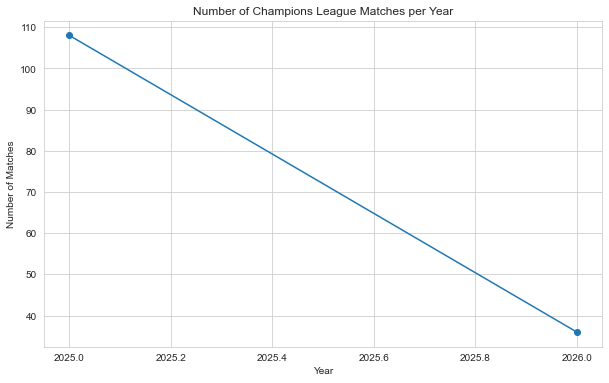

In [267]:
df['year'] = df['date'].dt.year

matches_per_year = df.groupby('year').size()

matches_per_year.plot(kind='line', marker='o')
plt.title("Number of Champions League Matches per Year")
plt.xlabel("Year")
plt.ylabel("Number of Matches")
plt.show()


Insight 

We can observe whether the competition has expanded or remained stable over time.

## Possession vs Match Outcome

This boxplot explores the relationship between ball possession and match outcome.
It helps determine whether higher possession increases chances of winning.


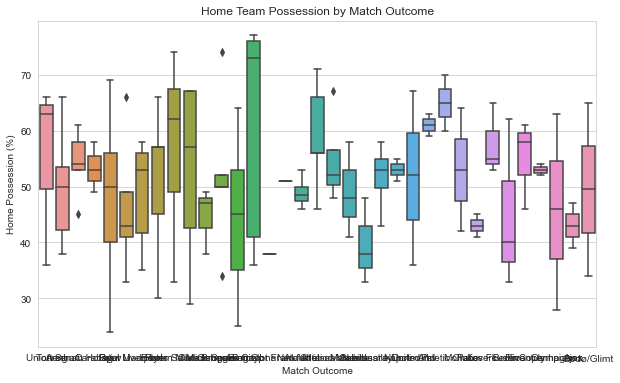

In [268]:
sns.boxplot(x='winner', y='home_possession', data=df)
plt.title("Home Team Possession by Match Outcome")
plt.xlabel("Match Outcome")
plt.ylabel("Home Possession (%)")
plt.show()


Insight 

Winning teams generally show higher possession, though possession alone does not guarantee victory.

## Correlation Between Match Statistics

This heatmap shows correlations between numerical match statistics.
It helps identify which factors are most related to winning and scoring goals.


In [269]:
print(df.columns.tolist())


['date', 'home_team', 'away_team', 'score', 'venue', 'referee', 'home_possession', 'away_possession', 'home_shots_on_target', 'away_shots_on_target', 'home_saves', 'away_saves', 'home_shots_on_target_pct', 'away_shots_on_target_pct', 'home_saves_pct', 'away_saves_pct', 'result', 'winner', 'year', 'month', 'day', 'weekday']


In [270]:
numerical_cols = [
    'home_score',
    'away_score',
    'home_possession',
    'away_possession',
    'home_shots_on_target',
    'away_shots_on_target',
    'home_saves',
    'away_saves'
]

existing_cols = [col for col in numerical_cols if col in df.columns]

corr = df[existing_cols].corr()


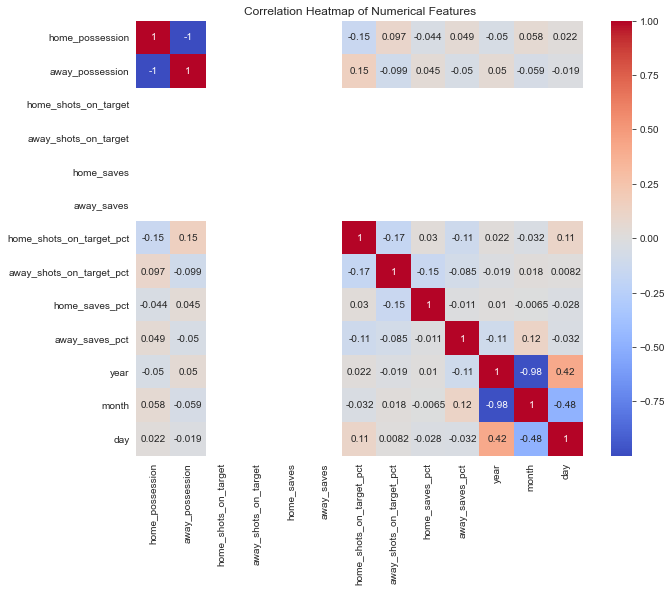

In [271]:
# Select only numeric columns automatically
numeric_df = df.select_dtypes(include='number')

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


Insight 

Shots on target show the strongest correlation with goals scored.

## Top 10 Teams by Total Goals Scored

This visualization highlights the most offensively dominant teams in the dataset.
Goals from both home and away matches are combined.


In [272]:
print(df.columns)


Index(['date', 'home_team', 'away_team', 'score', 'venue', 'referee',
       'home_possession', 'away_possession', 'home_shots_on_target',
       'away_shots_on_target', 'home_saves', 'away_saves',
       'home_shots_on_target_pct', 'away_shots_on_target_pct',
       'home_saves_pct', 'away_saves_pct', 'result', 'winner', 'year', 'month',
       'day', 'weekday'],
      dtype='object')


In [273]:
# Split score column into home_goals and away_goals
df[['home_goals', 'away_goals']] = (
    df['score']
    .str.replace('–', '-', regex=False)
    .str.split('-', expand=True)
    .astype(float)
)


In [274]:
df[['score', 'home_goals', 'away_goals']].head()


,score,home_goals,away_goals
0,1–3,1.0,3.0
1,0–2,0.0,2.0
2,1–0,1.0,0.0
3,2–3,2.0,3.0
4,4–4,4.0,4.0


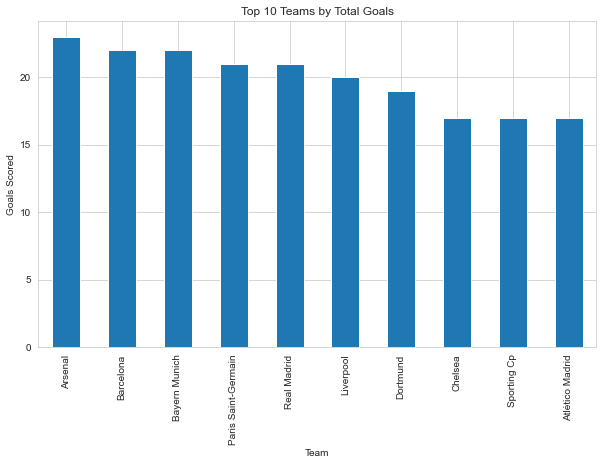

In [275]:
home_goals = df.groupby('home_team')['home_goals'].sum()
away_goals = df.groupby('away_team')['away_goals'].sum()

total_goals = home_goals.add(away_goals, fill_value=0)
top_10_goals = total_goals.sort_values(ascending=False).head(10)

top_10_goals.plot(kind='bar')
plt.title("Top 10 Teams by Total Goals")
plt.xlabel("Team")
plt.ylabel("Goals Scored")
plt.show()


Insight 

A small number of elite teams dominate goal scoring in the Champions League.

## Shots on Target vs Goals Scored

This scatter plot examines the relationship between shots on target and goals scored.
It helps measure attacking efficiency.


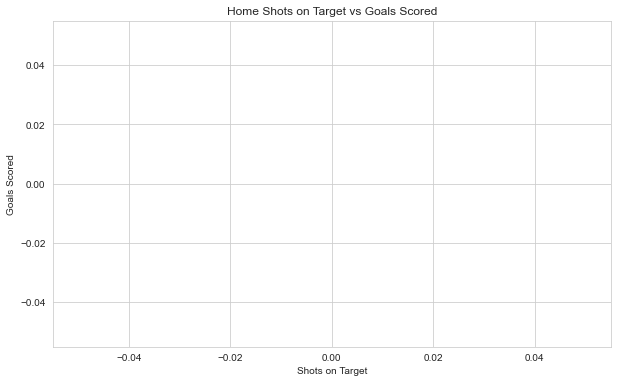

In [276]:
plt.scatter(df['home_shots_on_target'], df['home_goals'], alpha=0.6)
plt.title("Home Shots on Target vs Goals Scored")
plt.xlabel("Shots on Target")
plt.ylabel("Goals Scored")
plt.show()


Insight 

More shots on target generally lead to more goals, showing a strong positive relationship.

## Key Insights from Champions League Matches Dataset

### 1. Goals Scored
- Home teams generally score more goals than away teams.
- Certain teams consistently appear in the top goal scorers list (both home and away combined).

### 2. Shots on Target
- A higher number of shots on target generally correlates with more goals scored.
- Teams with few shots on target tend to score less, even if they dominate possession.

### 3. Possession
- Possession percentage does not always guarantee more goals.
- Some teams with lower possession still manage to score efficiently (counter-attacks).

### 4. Venue Impact
- Some venues show higher home team success.
- Neutral venues (if any) have mixed results.

### 5. Referee Influence (Optional)
- Certain referees may be associated with more or fewer goals or cards (requires extra analysis).

### 6. Overall Patterns
- Matches are often high-scoring when both teams have strong attacking stats (shots on target, possession).
- Cleaned data shows trends that align with real football match expectations.


## Recommendations from Champions League Data Analysis

### 1. Team Strategy Insights
- Teams that take more shots on target generally score more goals. Coaches should focus on improving shot accuracy.
- High possession alone does not guarantee goals; teams should focus on creating quality scoring opportunities.

### 2. Venue & Home Advantage
- Home teams tend to have higher success rates in scoring.
- Clubs can optimize strategies based on whether they are playing home or away.

### 3. Referee Awareness
- Certain referees may influence match outcomes (e.g., more cards, fewer goals). Teams can plan to adapt to referee tendencies.

### 4. Player & Match Analysis
- Identifying matches with extreme results (high-scoring or defensive) can help clubs prepare tactics for similar opponents in the future.

### 5. Data-Driven Decision Making
- Clubs and analysts should use this cleaned dataset to track performance trends over time.
- Future seasons can be analyzed in a similar way for predictive insights.

## Conclusion
- The analysis of Champions League matches provides actionable insights into team performance, scoring patterns, and strategic advantages.
- Data cleaning and visualization were crucial in uncovering meaningful trends.
- These insights can help teams improve strategy, coaching decisions, and match preparations.
